In [1]:
%matplotlib inline
import sys
import os
working_dir_path = os.getcwd()
genomagic_qa_repo_path = '/'.join(working_dir_path.split('/')[:-1])
print("repo location: {}".format(genomagic_qa_repo_path))
sys.path.append(genomagic_qa_repo_path)
import redshift.redshift_queries as rs

repo location: /home/ariel/clients/genomagic_qa


In [2]:
data_version=os.getenv("DATA_VERSION")
host=os.getenv("REDSHIFT_HOST")
#host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
#data_version='dm_gm_public_maize_232'
assert data_version is not None, "env variable DATA_VERSION is not defined"
assert host is not None, "env variable REDSHIFT_HOST is not defined"



genotyping_by_sequencing samples count = 187
applied_reference_genome samples count = 11
snp_marker samples count = 279
whole_genome_sequencing samples count = 25
[27236787, 5164628]


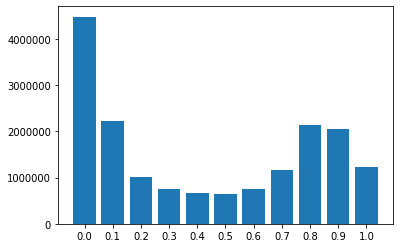

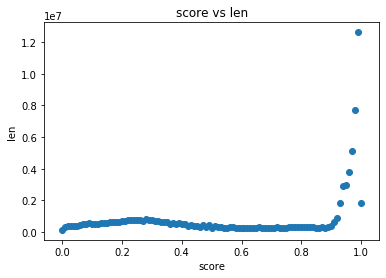

In [3]:
print(rs.get_samples_type_info_as_string(host, data_version))
print(rs.get_hap_count_total_hap_markers_as_string(host, data_version))
rs.hist_count(host, data_version)
rs.hist_count2(host, data_version)

full similarity count written to similarity_length.csv


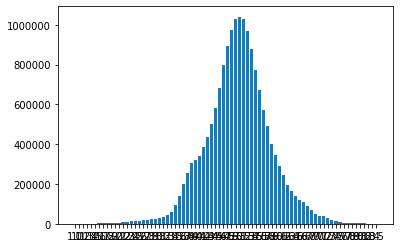

In [5]:
#v1 = rs.get_median_length_of_hap_similarity(host, data_version,0)
#v2 = rs.get_median_length_of_hap_similarity(host, data_version,0.9)
#print('median_length_of_hap_similarity is {}, and for score>0.9 its {}'.format(v1,v2))
#v1 = rs.get_average_length_of_hap_similarity(host, data_version,0)
#v2 = rs.get_average_length_of_hap_similarity(host, data_version,0.9)
#print('average length_of_hap_similarity is {}, and for score>0.9 its {}'.format(v1,v2))

#TODO: fix bug
#m = rs.total_similarity(host, data_version)
#print('mean similarity coverage is {}'.format(m))
print('full similarity count written to similarity_length.csv')
rs.len_histogram(host, data_version)